In [4]:
 
import os
import numpy as np
# THIS LIBRARY BASICALLY USED FOR STATISTICAL COMPUTATIONAL PURPOSES 
import matplotlib.pyplot as plt
# THIS LIBRARY USED FOR VISUALISSATION PURPOSES
import cv2
from sklearn.utils import shuffle
# THIS LIBRARY USED FOR SHUFFLING THE DATA SO THAT OUR MODEL DOESN'T GET OVERFIT OR UNDERFIT
from sklearn.model_selection import train_test_split
# THIS LIBRARY USED FOR DIVIDING THE DATA INTO TRAINING AND TESTING DATA
from keras import backend as K
#K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.utils import to_categorical
# THIS LIBRARY BASICALLY USED FOR CHANGING THE CATEGORICAL DATA INTO BINARY FORM 
# 
from keras.models import Sequential
# WITH THIS LAYEER WE MADE THE GIST OF OUR MODEL
from keras.layers.core import Dense, Dropout, Activation, Flatten
# DENSE IS CATEGORY OF LAYER, DROPOUT USED FOR OVERFITTING PROBLEMS
# ACTIVATION USED FOR ACTIVATION PURPOSES
# FLATTEN USED FOR CONVERTING IMAGEES CONTAINING PIXELS INTO VECTORS
from PIL import Image
# THIS LIBRARY USED FOR IMPORTING DIRECT IMAGES TO THE MODEL
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
# THIS LIBRARY USED TO REDUCE THE DIMENSIONS OF THE DATA MORE EFFICIENT IN COMPARISON WITH FILTERS
from keras.layers import Flatten
from keras.layers import Dense
path="C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/"
Xlist=[]
Ylist=[]
# HERE WE STORE OUR IMAGES IN THE FORM OF ARRAY
labels_name={'Ill_cucumber':0 ,'good_Cucumber':1}
# HERE WE LABELLED OUR HEALTHY PLANTS AS 1 AND ILL AS 0

for directory in os.listdir(path):
    for file in os.listdir(path+directory):
       print(path+directory+"/"+file)
       label = labels_name[directory]
       input_img=cv2.imread(path+directory+"/"+file)
       input_img_resize = cv2.resize(input_img,(224,224))
       Xlist.append(input_img_resize)
       Ylist.append(label)
# HERE WE IMPORT OUR IMAGES AND RESIZING INTO 224X224 PIXELS 
img_data = np.array(Xlist)
#img_data = img_data.astype('float32')
img_data=img_data /255
# HERE WE CONVERTING ALL OUR IMAGES FROM 0-255 PIXELS TO 0-1 PIXELS
print (img_data.shape)
labels = np.array(Ylist)
print(np.unique(labels,return_counts=True))
# convert class labels to one-hot encoding
Y = np_utils.to_categorical(labels, 2)
# converting categorical data into binary form 

x,y = shuffle(img_data,Y, random_state=1)
# shuffling the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)       
# splitting data into 70/30 ratio


from keras.layers import ZeroPadding2D
# THIS LIBRARY IS USED FOR PADDING OUR IMAGES SO THAT SOME USEFUL INFORMATION DIDN'T GET DISCARD FROM THE REAL IMAGE
#initialize
classifier=Sequential()
#adding convolution layer

classifier.add(Conv2D(64,(3, 3), input_shape = (224, 224, 3), activation = 'relu',padding = 'same'))
# ADDING LAYER having 64 neurons having input image size 224x224x3 
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(ZeroPadding2D(padding=(1, 1), data_format=None))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu',padding = 'same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(ZeroPadding2D(padding=(1, 1), data_format=None))

classifier.add(Conv2D(64, (3, 3), activation = 'relu',padding = 'same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(ZeroPadding2D(padding=(1, 1), data_format=None))
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(ZeroPadding2D(padding=(1, 1), data_format=None))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


#flattening
classifier.add(Flatten())
# converting our layers into vectors
#ann
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=98,activation='relu'))
classifier.add(Dense(units=88,activation='relu'))
classifier.add(Dense(units=68,activation='relu'))
classifier.add(Dense(units=38,activation='relu'))
classifier.add(Dense(units=2,activation='softmax'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# compiling model using adam optimizer with binary crossentropy and metrics accuracy
#image augumentation
classifier.save_weights("finall.h5")
# here we saving our model weights
hist = classifier.fit(X_train, y_train, batch_size=16, epochs=40, verbose=1, validation_data=(X_test, y_test))
# visualizing losses and accuracy

classifier.save("model3.h5")
classifier.load_weights("model3.h5")
# here we are loding our weights


C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629182252.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629182254.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629182855.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629182856.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629182856_01.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629182857.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629182859.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629182903.jpg
C:/Users/Pranchal/Desktop/Project/cuc

C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183044.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183044_01.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183045.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183046.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183048.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183049.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183050.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183050_01.jpg
C:/Users/Pranchal/Desktop/Project/

C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183247.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183249.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183250.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183251.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183252.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183253.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183255.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183256.jpg
C:/Users/Pranchal/Desktop/Project/cucumb

C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183445.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183447.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183449.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183450.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183532.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183533.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183534.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183535.jpg
C:/Users/Pranchal/Desktop/Project/cucumb

C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/photo_2020-06-28_00-09-54.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/photo_2020-06-28_00-09-55.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/photo_2020-06-28_00-09-56.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/photo_2020-06-28_00-09-59.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/photo_2020-06-28_00-10-00.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/photo_2020-06-28_00-10-05.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/photo_2020-06-28_00-10-06.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/good_Cucumber/photo_

C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182026.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182031.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182038.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182045.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182047.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182048.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182054.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182055.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucum

C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182316.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182316_01.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182317.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182321.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182321_01.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182322.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182329.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182334.jpg
C:/Users/Pranchal/Desktop/Project/cucumber

C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182719.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182720.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182721.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182725.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182726.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182726_01.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182746.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/IMG20200629182747.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cu

C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-53-39.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-53-40 (2).jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-53-40.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-53-41.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-53-42.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-53-44 (2).jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-53-44.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_

C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-54-55.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-54-56.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-54-57.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-54-58.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-54-59.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-55-00.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-27_23-55-01.jpg
C:/Users/Pranchal/Desktop/Project/cucumber/Cucumber plant diseases dataset/training/Ill_cucumber/photo_2020-06-

31/31 [==============================] - 46s 1s/step - loss: 0.5717 - accuracy: 0.7308 - val_loss: 0.5809 - val_accuracy: 0.5817
Epoch 5/40
31/31 [==============================] - 47s 2s/step - loss: 0.5579 - accuracy: 0.7557 - val_loss: 0.5258 - val_accuracy: 0.7837
Epoch 6/40
31/31 [==============================] - 47s 2s/step - loss: 0.4662 - accuracy: 0.8240 - val_loss: 0.4116 - val_accuracy: 0.8173
Epoch 7/40
31/31 [==============================] - 45s 1s/step - loss: 0.4090 - accuracy: 0.8468 - val_loss: 0.3018 - val_accuracy: 0.8846
Epoch 8/40
31/31 [==============================] - 47s 2s/step - loss: 0.4166 - accuracy: 0.8385 - val_loss: 0.3552 - val_accuracy: 0.8029
Epoch 9/40
31/31 [==============================] - 47s 2s/step - loss: 0.3673 - accuracy: 0.8385 - val_loss: 0.5094 - val_accuracy: 0.8269
Epoch 10/40
31/31 [==============================] - 45s 1s/step - loss: 0.4197 - accuracy: 0.8344 - val_loss: 0.3767 - val_accuracy: 0.8462
Epoch 11/40
31/31 [===========

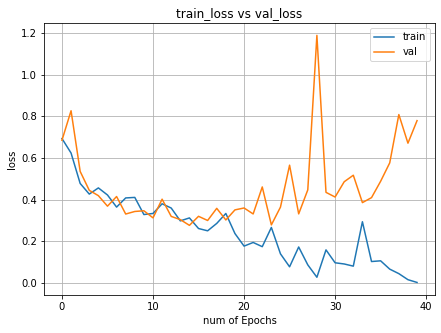

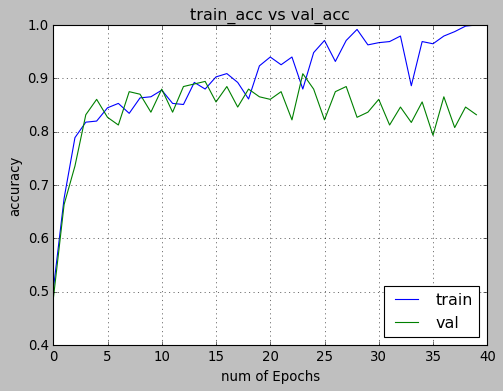

In [3]:

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(40)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# we are making visualisations that how much loss is varying with no. of epochs
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# how accuracy is varying with the no. of epochs 
